## 1. Segmentación de datos de redes sociales. (30 puntos)

En el archivo “snsdata.csv” se encuentra los términos más utilizados en unos 30.000 perfiles 
aleatorios de adolescentes de una red social. Importar el archivo y separar el conjunto de datos en 
dos según el género de los usuarios (F y M). En cada uno de los subconjuntos de datos eliminar el 
año de graduación ('gradyear'), el género ('gender') y la edad (‘age’). Utilizando el algoritmo de k-
means identificar el número de segmentos óptimos en los que se divide cada subconjunto de 
datos y obtener los valores de los centroides.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('snsdata.csv')
len(data)

30000

In [3]:
data.head(5)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Filtramos por hombres y mujeres el dataset

In [4]:
dataM = data[data['gender']=='M']
dataF = data[data['gender']=='F']
len(dataF)

22054

Eliminamos las columnas indicadas en el enunciado

In [5]:
exclude = ['gradyear', 'gender', 'age']
dataMfiltered = dataM.ix[:, dataM.columns.difference(exclude)]
dataFfiltered = dataF.ix[:, dataF.columns.difference(exclude)]

Calculamos por los métodos de dispersion como por siloute cual es el número idóneo de clusters

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


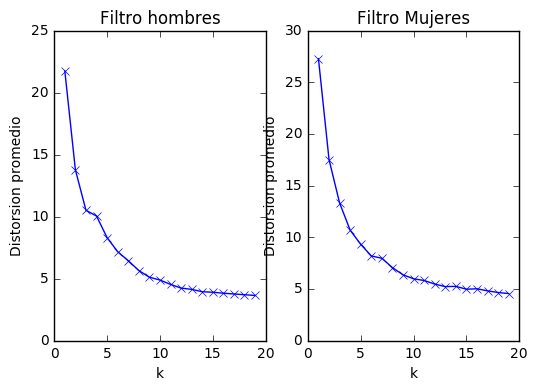

In [6]:
%pylab
%matplotlib inline
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

def plot_distorsion(x, figure_name, max_k = 20, n_init = 20):
    meandistortions = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = n_init).fit(x)
        meandistortions.append(sum(np.min(cdist(x, kmeans.cluster_centers_,
                                                'euclidean'), axis = 1))
                               / x.shape[0])

    plot(range(1, max_k), meandistortions, 'bx-')
    xlabel('k')
    ylabel('Distorsion promedio')
    title(figure_name)

subplot(1, 2, 1)
plot_distorsion(dataMfiltered, 'Filtro hombres')
subplot(1, 2, 2)
plot_distorsion(dataFfiltered, 'Filtro Mujeres')

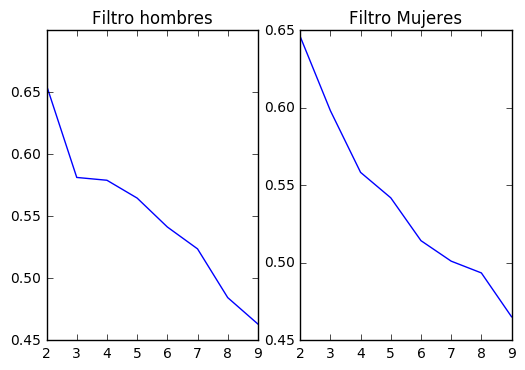

In [7]:
from sklearn.metrics import silhouette_score

def plot_sillhouette(blobs, figure_name, max_k = 10, n_init = 10):
    sillhouette_avgs = []
    
    for k in range(2, max_k):
        kmean = KMeans(n_clusters = k, n_init = n_init).fit(blobs)
        sillhouette_avgs.append(silhouette_score(blobs, kmean.labels_))
        
    plot(range(2, max_k), sillhouette_avgs)
    title(figure_name)

    
subplot(1, 2, 1)   
plot_sillhouette(dataMfiltered, 'Filtro hombres')
subplot(1, 2, 2)
plot_sillhouette(dataFfiltered, 'Filtro Mujeres')

Por el método de distorsion, vemos que el numero de cluster ideal para hombres podría ser 8, porque a medida que se aumenta, no mejora la gráfica, y para las mujeres podría ser 5, que es donde ya la pendiente se reduce y mejora poco.

Calculamos entonces los centroides....

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 8).fit(dataMfiltered)

print "Algortimo sklearn"
print kmeans.cluster_centers_


Algortimo sklearn
[[  2.66971777e-02   4.02745995e-01   2.79176201e-01   3.03585050e-01
    2.97482838e-02   1.37299771e-02   9.15331808e-03   1.83829138e-01
    8.23798627e-02   6.17848970e-02   2.05186880e-01   1.31960336e-01
    1.89931350e-01   3.66132723e-02   5.11060259e-02   7.39893211e-02
    5.01906941e-01   1.70625477e+01   4.16475973e-01   1.96033562e-01
    3.20366133e-02   5.49199085e-02   1.28909230e-01   6.78871091e-02
    1.55606407e-01   5.18688024e-02   7.39130435e-01   2.40274600e-01
    1.90694127e-01   9.22959573e-02   3.73760488e-02   1.63996949e-01
    7.62776506e-03   2.13577422e-01   9.61098398e-02   9.68726163e-02
    2.74599542e-02]
 [  5.43478261e-02   3.69565217e-01   4.20289855e-01   4.23913043e-01
    4.71014493e-02   3.26086957e-02   2.53623188e-02   3.36956522e-01
    9.05797101e-02   8.69565217e-02   3.07971014e-01   1.05072464e-01
    2.02898551e-01   2.89855072e-02   6.52173913e-02   9.78260870e-02
    4.96376812e-01   8.37500000e+01   6.12318841e-01

In [9]:
from sklearn.cluster import KMeans

kmeans_F = KMeans(n_clusters = 5).fit(dataFfiltered)

print "Algortimo sklearn"
print kmeans_F.cluster_centers_

Algortimo sklearn
[[  5.43130990e-02   3.34301481e-01   7.47894278e-02   2.86523381e-01
    2.20737729e-02   1.47255301e-01   1.35927970e-01   2.84635492e-01
    1.76590183e-01   4.04879466e-01   5.18733663e-01   1.32006971e-01
    1.95469068e-01   1.40139413e-01   6.01219866e-02   9.51205344e-02
    2.30612838e-01   3.34606448e+01   5.06970665e-01   5.03340110e-01
    8.01626489e-02   1.54225966e-01   1.15596863e-01   1.17629974e-01
    2.94365379e-01   4.76328783e-02   8.18472263e-01   2.68370607e-01
    2.44554168e-01   1.60470520e-01   4.59773453e-01   2.55155388e-01
    2.13912286e-01   1.41736857e-01   1.62358408e-01   8.87307581e-02
    2.03601510e-01]
 [  1.01419878e-01   2.65720081e-01   1.06490872e-01   3.94523327e-01
    2.83975659e-02   1.59229209e-01   2.25152130e-01   3.84381339e-01
    1.70385396e-01   5.40567951e-01   6.28803245e-01   1.41987830e-01
    2.06896552e-01   1.73427992e-01   5.37525355e-02   1.13590264e-01
    2.91075051e-01   1.30215010e+02   6.28803245e-01

## 2. Componentes principales. (20 puntos)
En el archivo “concrete.csv” se encuentra los datos de diferentes mezclas de hormigón. Utilizar el análisis de componentes principales y obtener el número de componentes principales con los que se puede explicar el 50%, 75% y 90% de la varianza. Obtener el porcentaje de la varianza que explica la primera componente principal.

In [10]:
import pandas as pd

data = pd.read_csv('concrete.csv')

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components = None)
pca.fit_transform(data)

print "El 50% de la varianza de las mezclas se puede explicar con", (cumsum(pca.explained_variance_ratio_) > 0.50).tolist().index(True) + 1,"variables"
print "El 75% de la varianza de las mezclas se puede explicar con", (cumsum(pca.explained_variance_ratio_) > 0.75).tolist().index(True) + 1,"variables"
print "El 90% de la varianza de las mezclas se puede explicar con", (cumsum(pca.explained_variance_ratio_) > 0.90).tolist().index(True) + 1,"variables"


El 50% de la varianza de las mezclas se puede explicar con 2 variables
El 75% de la varianza de las mezclas se puede explicar con 3 variables
El 90% de la varianza de las mezclas se puede explicar con 5 variables


## 3. Regresión de una función con Theano. (35 puntos)

Crear un conjunto de datos utilizando el siguiente código:
trX	=	np.linspace(-1,	1,	101)	
trY	=	np.linspace(-1,	1,	101)	
for	i	in	range(len(trY)):	
	 	 	 	 trY[i]	 =	 math.log(1	 +	 0.5	 *	 abs(trX[i]))	 +	 trX[i]	 /	 3	 +	
np.random.randn()	*	0.033	

Ahora utilizar Theano para obtener los parámetros w_0 y w_1 del siguiente modelo
utilizando los datos generados anteriormente.

y = log(1 + w0|x|) + w1x,

In [12]:
import numpy as np
import math
import theano
import theano.tensor as T
from theano.ifelse import ifelse


trY = np.linspace(-1, 1, 101)
trX = np.linspace(-1, 1, 101)
for i in range(len(trY)):
    trY[i] = math.log(1 + 0.5*abs(trX[i])) + trX[i] / 3 + np.random.randn()*0.033



WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


In [13]:
trX = np.linspace(-1, 1, 101)
#trY = 2 * trX + np.random.randn(*trX.shape) * 0.33
trY = math.log(1 + 0.5*abs(trX)) + trX/3 + np.random.randn()*0.033

X = T.scalar()
Y = T.scalar()

def model(X, w):
    return X * w

w = theano.shared(np.asarray(0., dtype = theano.config.floatX))
y = model(X, w)

cost     = T.mean(T.sqr(y - Y))
gradient = T.grad(cost = cost, wrt = w)
updates  = [[w, w - gradient * 0.01]]

train = theano.function(inputs = [X, Y], outputs = cost, updates = updates, allow_input_downcast = True)

for i in range(15):
    for x, y in zip(trX, trY):
        cost_i = train(x, y)
    print 'En el paso', i, ' el valor de w es', w.get_value(), 'con un coste', cost_i

TypeError: only length-1 arrays can be converted to Python scalars